<a href="https://colab.research.google.com/github/vismithapy/Aeroplane-Crash-DV-project/blob/main/Aeroplane_Crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA VISUALISATION GROUP PROJECT**

## **AEROPLANE CRASH**


*   Vismitha PY    - 20181IST0090
*   Amulya S       - 20181IST0008
*   Samarth KP     - 20181IST0069
*   Sindhu Shree - 20181IST0071
*   Vinaya S       - 20181IST0089







## **Introduction**

Air crash is also known as an aviation accident and incident. Much of the aviation such as airplane, helicopter, air balloon and jet plane are design involves ensuring with a high level of safety. However, aviation accidents do happen in anytime and harm human life. It is unpredictable and unpreventable accident with the resulting loss of life tragic. We understand that there is no amount of money can replace who has been lost in any type of accident or any destruction.
Aviation accident cases can be extremely complex because it might lead to a lot of things happen in a single time. Many people are at risk of injury when an aviation accident occurs. Injuries from aviation accidents can range from minor cuts and bruises to catastrophic injuries or death. It is depending on the situation of the accident

In [ ]:
#importing the libraries and data
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

Data = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')

# **Dataset explanation:**

The dataset used contains the following parameters:

*   Date     : It is the date when the accident took place.
*   Time     : It is the time when the accident took place.
*   Location : It the place where the accident has been reported to occur.
*   Operator : It says if the flight was a government owned or private.
*   Flight # : It the serial number assigned to flights.
*   Route    : It is the route which the flight takes.
*   Type     : It describes about the type of flight.
*   Registration: It tells about the registration number of the flight.
*   cn/In    : It is the units of measurement of flight dimensions.
*   Aboard   : It tells the number of passengers that were on board during the flight accident.
*   Fatalities : It the number of deaths that occurred in the accident.
*  Ground   : It tells number of people that passed away on ground those who weren’t on board
*   Summary: It describes about the way the accident occurred.
































---






In [ ]:
np.random.seed(42) 
obs, feat = Data.shape
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4793,07/30/2001,2001-07-30 16:00:00,"Haines, Alaska",AIR TAXI,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
5020,11/28/2004,2004-11-28 09:55:00,"Montrose, Colorado",GLOW AIR/AIR CASTLE - CHARTER,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
655,06/20/1944,1944-06-20 00:00:00,"Porto Alegre, Brazil",VARIG,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
1874,10/09/1963,1963-10-09 00:00:00,"Near Marseilles, France",AERONAVES DE PANAMA,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
2318,06/05/1969,1969-06-05 07:12:00,"North Bend, Oregon",EUREKA AERO INC. - AIR TAXI,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


# Code Explanation
*   **random.seed** - NumPy random seed is simply a function that sets the random seed of the NumPy pseudo-random number generator. It provides an essential input that enables NumPy to generate pseudo-random numbers for random processes.

*   **Data.shape** - it is used to give number of entries in the matrix of dataset.

*   **Data.sample** - To display 5 random values.


---
















# **Data PreProcessing**


* Data.isnull().sum() -This function takes a scalar or array-like object and indicates whether values are missing

* Cleaning up - The data in the dataset will have missing values. This needs to be addressed.We can either remove the dataset or add some filler which is common to all the missing data. So we also use the cleaning part.
In addition to this, in the date column, we may have data with different formats. All the above mentioned issues are corrected with the following lines of code.


---








In [ ]:
Data.isnull().sum() #calculating missing values in rows

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [ ]:
#cleaning up
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00')

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M') #returns exact date and time in a proper format.
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


# **Data Visualization** 

Total accidents

**Explanation**


*   Data.groupby- function is used to split the data into groups based on some criteria.to provide a mapping of labels to group names.

*   The count()-is a built-in function in Python. It will return the total count of a given element in a string.

*   plt.figure() -The function in pyplot module of matplotlib library is used to create a new figure.

*   plt.plot- to plot line graph.

*   plt.style.use- Matplotlib also has stylesheets inspired by the Seaborn library

*   The xlabel()- function in pyplot module of matplotlib library is used to set the label for the x-axis

*   the ylabel()-This function sets the label for the y-axis of the plot.

*   plt.title()-The title() method in matplotlib module is used to specify title of the visualization depicted and displays the title using various attributes.
 
*   plt. show()- starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.


---












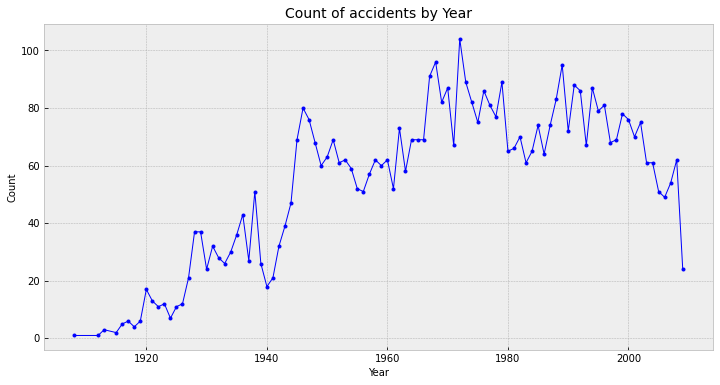

In [ ]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()


**Count of Accidents by Month, Year, Hour**


*   Seaborn - is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily.

*   GridSpec -specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set

*   plt.subplots -creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created.

*   tight_layout- automatically adjusts subplot params so that the subplot(s) fits in to the figure area.

*   xticks() function is used to get or set the current tick locations and labels of the x-axis

*   A bar plot - represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.


---












/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


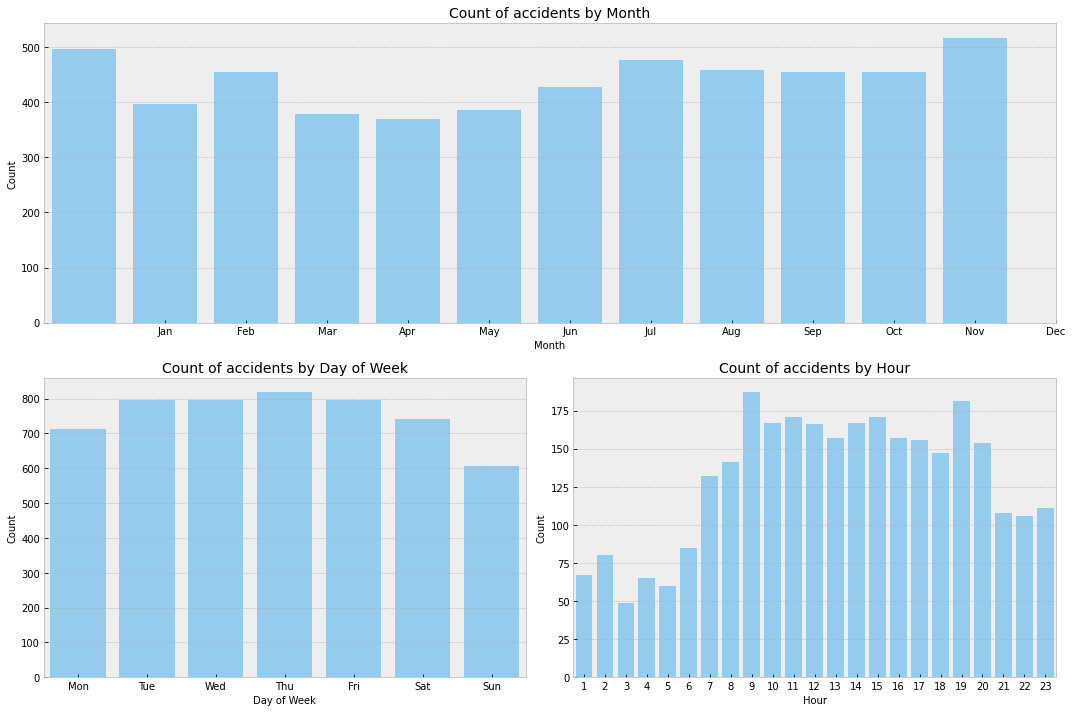

In [ ]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(Data.groupby(Data.Time.dt.month)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.month)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count().index, 'Date', data=Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

**Total number of accidents by Type of Flight**


*   Temp & Temp2- used to copy the dataset from Data

*   Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')- is used to create a new column 'isMilitary' which stores the values of the row that contains only "MILITARY' aircraft.

*   Temp = Temp.groupby('isMilitary')[['isMilitary']].count()- is used to count the number of entries in the new column.

*   Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]- is used to extract all the row values from 'Time','Military' and "Passenger'.

*   count_nonzero()- counts the number of non-zero values in the array arr.

*   A legend is an area describing the elements of the graph.


*   plt.axis()-The plt.axis() method allows you to set the x and y limits with a single call, by passing a list which specifies [xmin, xmax, ymin, ymax].
patches- is used to store the return legend values.










---






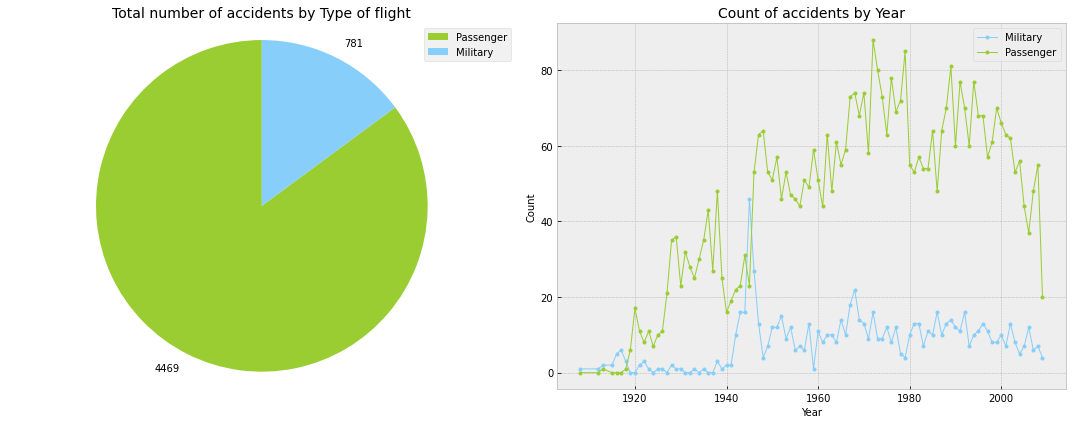

In [ ]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = Data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

**Total number of people involved by Year**



*   Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard'] - is used to find the proportion of death by dividing the number of fatalities by total number of people on board

*   figsize - is used to give the size of the figure.

*   fill_between - is used to fill the space in the plot region.
plot is to plot the line graph.


---







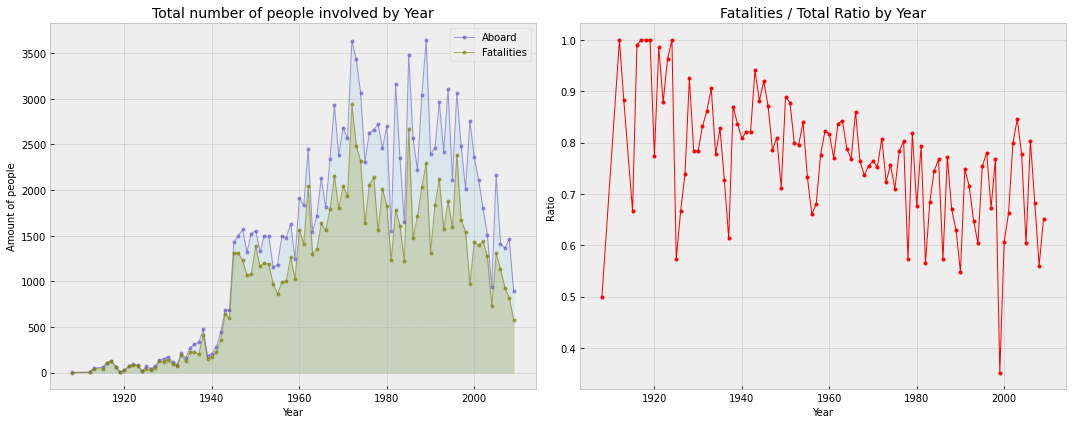

In [ ]:
Fatalities = Data.groupby(Data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

# **Conclusion:**

As we have seen from the above visualizations, using the data set of crash reports from 1900, we have analysed the different perspectives of flight crash such as count of accidents in a year, month, days and hour. We have also visualized the number of accidents by the type of flight, and also by the year. Also we have visualised the number of fatalities that have occurred on board and ground and even the fatality ratio per year. We have visualised these in the form of line graphs, double line graphs, bar graphs, pie chart using the libraries such as Numpy, Pandas, Seaborn, Matplotlib and DateTime.


---



---


